In [1]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p13"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [2]:
import p13_test

In [3]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p13
# submitter: cheng274
# partner: none

 # Project 13: World University Rankings

## Learning Objectives:

In this project, you will demonstrate how to:

* query a database using SQL,
* process data using `pandas` **DataFrames**,
* create different types of plots.

Please go through [Lab-P13](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/tree/main/lab-p13) before working on this project. The lab introduces some useful techniques related to this project.

## Note on Academic Misconduct:

**IMPORTANT**: P12 and P13 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P12, you have to sustain that partnership until end of P13. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/s23/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the file `p13_test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

For answers involving DataFrames, `p13_test.py` compares your tables to those in `p13_expected.html`, so take a moment to open that file on a web browser (from Finder/Explorer).

For answers involving plots, `p13_test.py` can **only** check that the **DataFrames** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

**IMPORTANT Warning:** Do **not** download the dataset `QSranking.json` **manually**. Use the `download` function from P12 to download it. When we run the autograder, this file `QSranking.json` will **not** be in the directory. So, unless your `p13.ipynb` downloads this file, you will get a **zero score** on the project. Also, make sure your `download` function includes code to check if the file already exists. Otherwise, you will **lose** points for **hardcoding**.

## Project Description:

For your final CS220 project, you're going to continue analyzing world university rankings. However, we will be using a different dataset this time. The data for this project has been extracted from [here](https://www.topuniversities.com/university-rankings/world-university-rankings/2023). Unlike the CWUR rankings we used in P12, the QS rankings dataset has various scores for the universities, and not just the rankings. This makes the QS rankings dataset more suitable for plotting (which you will be doing a lot of!).

In this project, you'll have to dump your DataFrame to a SQLite database. You'll answer questions by doing queries on that database. Often, your answers will be in the form of a plot. Check these carefully, as the tests only verify that a plot has been created, not that it looks correct (the Gradescope autograder will manually deduct points for plotting mistakes).

## Project Requirements:

You **may not** hardcode indices in your code. You **may not** manually download **any** files for this project, unless you are **explicitly** told to do so. For all other files, you **must** use the `download` function to download the files.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Functions:
- `bar_plot`
- `scatter_plot`
- `horizontal_bar_plot`
- `pie_plot`
- `get_regression_coeff`
- `get_regression_line`
- `regression_line_plot`
- `download`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Data Structures:
- `conn`

You **must** write SQL queries to solve the questions in this project, unless you are **explicitly** told otherwise. You will **not get any credit** if you use `pandas` operations to extract data. We will give you **specific** instructions for any questions where `pandas` operations are allowed. In addition, you are also **required** to follow the requirements below:

* You **must** close the connection to `conn` at the end of your notebook.
* Do **not** use **absolute** paths such as `C://ms//cs220//p13`. You may **only** use **relative paths**.
* Do **not** hardcode `//` or `\` in any of your paths. You **must** use `os.path.join` to create paths.
* Do **not** leave irrelevant output or test code that we didn't ask for.
* **Avoid** calling **slow** functions multiple times within a loop.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/blob/main/p13/rubric.md).

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import sqlite3
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import math
import numpy as np
import os
import requests

Now, you may copy/paste some of the functions and data structures you defined in Lab-P13 and P12, which will be useful for this project.

In [5]:
# this ensures that font.size setting remains uniform
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different.

In [6]:
# copy/paste the definition of the function 'bar_plot' from lab-p13 here
def bar_plot(df, x, y):
    ax = df.plot.bar(color='black', legend=False, x=x, y=y)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [7]:
# copy/paste the definition of the function 'scatter_plot' from lab-p13 here
def scatter_plot(df, x, y):
    ax = df.plot.scatter(color='black', legend=False, x=x, y=y)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [8]:
# copy/paste the definition of the function 'horizontal_bar_plot' from lab-p13 here
def horizontal_bar_plot(df, x):
    df = df.set_index(x)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [9]:
# copy/paste the definition of the function 'pie_plot' from lab-p13 here
def pie_plot(df, x, y, title=None):
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)

In [10]:
# copy/paste the definition of the function 'get_regression_coeff' from lab-p13 here
def get_regression_coeff(df, x, y):
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

In [11]:
# copy/paste the definition of the function 'get_regression_line' from lab-p13 here
def get_regression_line(df, x, y):
    coeff = get_regression_coeff(df, x, y)
    m = coeff[0]
    b = coeff[1]
    df['fit'] = m * df[x] + b
    
    return df

In [12]:
# copy/paste the definition of the function 'regression_line_plot' from lab-p13 here
def regression_line_plot(df, x, y):
    """regression_line_plot(df, x, y) takes in a DataFrame 'df' and displays
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis, as well as the best fit line for the plot"""
#     pass # replace with your code
    # TODO: use 'get_regression_line' to get the data for the best fit line.
    regression_line = get_regression_line(df, x, y)
    # TODO: use df.plot.scatter (not scatter_plot) to plot the x and y columns
    #       of 'df' in black color.
    ax = regression_line.plot.scatter(color='black', legend=False, x=x, y=y)
    
    # TODO: save the return value of df.plot.scatter to a variable called 'ax'
    
    
    # TODO: use df.plot.line to plot the fitted line in red,
    #       using ax=ax as a keyword argument.
    #       this ensures that both the scatter plot and line end up on the same plot
    #       play careful attention to what the 'x' and 'y' arguments ought to be
    
    
    regression_line.plot.line(color='red', legend=False, x=x, y='fit', ax=ax)

In [13]:
# copy/paste the definition of the function 'download' from p12 here
def download(url, filename):
    
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    
    res = requests.get(url)
    if res.status_code != 200:
        res.raise_for_status()
    the_text = res.text
    file = open(filename, "w")
    file.write(the_text)
    file.close()
    return (str(filename) + " created!")

In [14]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/raw/main/p13/QSranking.json'
# to the file 'QSranking.json'
download('https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s23-projects/-/raw/main/p13/QSranking.json', "QSranking.json")

'QSranking.json already exists!'

### Data Structure 1: `conn`

You **must** now create a **database** called `rankings.db` out of `QSranking.json`, connect to it, and save it in a variable called `conn`. You **must** use this connection to the database `rankings.db` to answer the questions that follow.

In [15]:
# create a database called 'rankings.db' out of 'QSranking.json'

# TODO: load the data from 'QSranking.json' into a variable called 'qs_ranking' using pandas' 'read_json' function
qs_ranking = pd.read_json('QSranking.json')
# TODO: connect to 'rankings.db' and save it to a variable called 'conn'
conn = sqlite3.connect('rankings.db')
# TODO: write the contents of the DataFrame 'qs_ranking' to the sqlite database
qs_ranking.to_sql("rankings", conn, if_exists="replace", index=False)

1201

In [16]:
# run this cell and confirm that you have defined the variables correctly

pd.read_sql("SELECT * FROM rankings LIMIT 5", conn)

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6


**Question 1:** List **all** the statistics of the institution with the `institution_name` *University Of Wisconsin-Madison*. 

You **must** display **all** the columns. The rows **must** be in *ascending* order of `year`.

Your output **must** be a **DataFrame** that looks like this:

||**rank**|**year**|**institution_name**|**country**|**academic_reputation**|**employer_reputation**|**faculty_student_score**|**citations_per_faculty**|**international_faculty**|**international_students**|**overall_score**|
|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**|55|2018|University Of Wisconsin-Madison|United States|94.0|62.1|84.0|54.2|53.2|30.9|75.8|
|**1**|53|2019|University Of Wisconsin-Madison|United States|88.5|51.2|87.4|52.6|58.8|30.6|73.2|
|**2**|56|2020|University Of Wisconsin-Madison|United States|87.8|49.7|85.5|50.0|57.2|30.9|71.8|

In [17]:
# compute and store the answer in the variable 'uw_rating', then display it
uw_rating = pd.read_sql("SELECT * FROM rankings WHERE `institution_name` = 'University Of Wisconsin-Madison'", conn)
uw_rating

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,55,2018,University Of Wisconsin-Madison,United States,94.0,62.1,84.0,54.2,53.2,30.9,75.8
1,53,2019,University Of Wisconsin-Madison,United States,88.5,51.2,87.4,52.6,58.8,30.6,73.2
2,56,2020,University Of Wisconsin-Madison,United States,87.8,49.7,85.5,50.0,57.2,30.9,71.8


In [18]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** What are the **top** *10* institutions in *Japan* which had the **highest** score of `international_students` in the `year` *2020*?

You **must** display the columns `institution_name` and `international_students`. The rows **must** be in *descending* order of `international_students`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**international_students**|
|---------|------|---------|
|**0**|Waseda University|35.8|
|**1**|Tokyo Institute Of Technology|31.3|
|**2**|University Of Tsukuba|30.4|
|**3**|The University of Tokyo|26.2|
|**4**|Kyushu University|21.5|
|**5**|Nagoya University|21.3|
|**6**|Tohoku University|17.6|
|**7**|Kyoto University|17.5|
|**8**|Hiroshima University|17.1|
|**9**|Tokyo Medical and Dental University|16.7|

In [19]:
# compute and store the answer in the variable 'japan_top_10_inter', then display it
japan_top_10_inter = pd.read_sql("SELECT institution_name, international_students FROM rankings WHERE `country` = 'Japan' AND `year` = 2020 ORDER BY `international_students` DESC LIMIT 10", conn)
japan_top_10_inter

,institution_name,international_students
0,Waseda University,35.8
1,Tokyo Institute Of Technology,31.3
2,University Of Tsukuba,30.4
3,The University Of Tokyo,26.2
4,Kyushu University,21.5
5,Nagoya University,21.3
6,Tohoku University,17.6
7,Kyoto University,17.5
8,Hiroshima University,17.1
9,Tokyo Medical And Dental University,16.7


In [20]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** What are the **top** *10* institutions in the *United States* which had the **highest** *reputation* in the `year` *2019*?

The `reputation` of an institution is defined as the sum of `academic_reputation` and `employer_reputation`. You **must** display the columns `institution_name` and `reputation`. The rows **must** be in *descending* order of `reputation`. In case the `reputation` is tied, the rows must be in *alphabetical* order of `institution_name`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**reputation**|
|---------|------|---------|
|**0**|Harvard University|200.0|
|**1**|Massachusetts Institute Of Technology|200.0|
|**2**|Stanford University|200.0|
|**3**|University Of California, Berkeley|199.8|
|**4**|Yale University|199.6|
|**5**|University Of California, Los Angeles|199.1|
|**6**|Columbia University|197.1|
|**7**|Princeton University|196.6|
|**8**|University Of Chicago|190.3|
|**9**|Cornell University|189.2|

**Hint:** You can use mathematical expressions in your **SELECT** clause. For example, if you wish to add the `academic_reputation` and `employer_reputation` for each institution, you could use the following query:

```sql
SELECT (`academic_reputation` + `employer_reputation`) FROM rankings
```

In [21]:
# compute and store the answer in the variable 'us_top_10_rep', then display it
us_top_10_rep  = pd.read_sql("""
SELECT institution_name, (`academic_reputation` + `employer_reputation`) as reputation 
FROM rankings 
WHERE country = 'United States' AND year = 2019 
ORDER BY reputation DESC, institution_name ASC 
LIMIT 10""", conn)
us_top_10_rep

,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [22]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** What are the **top** *10* countries which had the **most** *institutions* listed in the `year` *2020*?

You **must** display the columns `country` and `num_of_institutions`. The `num_of_institutions` of a country is defined as the number of institutions from that country. The rows **must** be in *descending* order of `num_of_institutions`. In case the `num_of_institutions` is tied, the rows must be in *alphabetical* order of `country`.

**Hint:** You **must** use the `COUNT` SQL function to answer this question.

Your output **must** be a **DataFrame** that looks like this:

||**country**|**num_of_institutions**|
|---------|------|---------|
|**0**|United States|74|
|**1**|United Kingdom|45|
|**2**|Germany|23|
|**3**|Australia|21|
|**4**|Canada|14|
|**5**|China|14|
|**6**|France|14|
|**7**|Japan|14|
|**8**|Netherlands|13|
|**9**|Russia|13|

In [23]:
# compute and store the answer in the variable 'top_10_countries', then display it
top_10_countries = pd.read_sql("SELECT country, COUNT(*) as num_of_institutions FROM rankings WHERE year = 2020 GROUP BY country ORDER BY num_of_institutions DESC, country ASC LIMIT 10", conn)

top_10_countries

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


In [24]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5:** Create a **bar plot** using the data from Question 4 with the `country` on the **x-axis** and the `num_of_institutions` on the **y-axis**.

In addition to the top ten countries, you **must** also aggregate the data for **all** the **other** countries, and represent that number in the column `Other`. You are **allowed** do this using any combination of  SQL queries and pandas operations.

You **must** first compute a **DataFrame** `num_institutions` containing the **country**, and the **num_of_institutions** data.

**Hint**: You can use the `append` function of a DataFrame to add a single row to the end of your **DataFrame** from Question 4. You'll also need the keyword argument `ignore_index=True`. For example:

```python
my_new_dataframe = my_dataframe.append({"country": "CS220", "num_of_institutions": 22}, ignore_index=True)
```
will create a *new* **DataFrame** `my_new_dataframe` which contains all the rows from `my_dataframe`, along with the **additional row** which has been appended. You can **ignore** any warnings about `append` being deprecated.

In [25]:
# first compute and store the DataFrame 'num_institutions', then display it
# do NOT plot just yet

# TODO: use a SQL query similar to Question 4 to get the number of institutions of all countries
#       (not just the top 10), ordered by the number of institutions, and store in a DataFrame
country_institution_df = pd.read_sql("""SELECT country, COUNT(*) as num_of_institutions
FROM rankings
WHERE year = 2020
GROUP BY country
ORDER BY num_of_institutions DESC, country ASC""", conn)
sum_institutions_after_10 = sum(country_institution_df[10:]["num_of_institutions"])

# TODO: Use pandas to find the sum of the institutions in all countries except the top 10

# TODO: create a new dictionary with the data about the new row that needs to be added
num_institutions = top_10_countries.append({"country": "Other", "num_of_institutions": sum_institutions_after_10}, ignore_index=True)
num_institutions

# TODO: properly append this new dictionary to 'num_institutions' and update 'num_institutions'

C:\Users\Charlie Yifan Cheng\AppData\Local\Temp\ipykernel_17712\1395246533.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_institutions = top_10_countries.append({"country": "Other", "num_of_institutions": sum_institutions_after_10}, ignore_index=True)


,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


In [26]:
grader.check("q5")

q5 results: All test cases passed!

Now, **plot** `num_institutions` as **bar plot** with the **x-axis** labelled *country* and the **y-axis** labelled *num_of_institutions*.

You **must** use the `bar_plot` function to create the plot.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

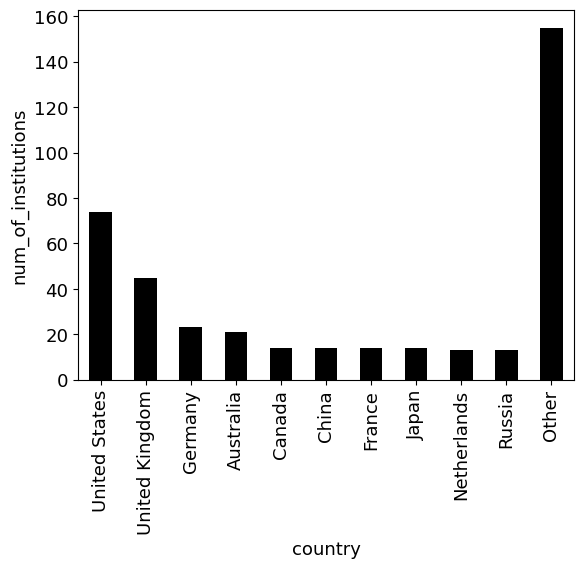

In [27]:
# create the bar plot using the DataFrame 'num_institutions' with the x-axis labelled "country" 
# and the y-axis labelled "num_of_institutions"
bar_plot(num_institutions, "country", "num_of_institutions")

**Question 6:** Create a **bar plot** of the **top** *10* countries with the **highest** *total* `overall_score` listed in the `year` *2019*.

The `total_score` of a `country` is defined as the **sum** of `overall_score` of **all** institutions in that `country`. You **must** display the columns `country` and `total_score`. The rows **must** be in *descending* order of `total_score`.

You **must** first compute a **DataFrame** `top_10_total_score` containing the **country**, and the **total_score** data.

Your **DataFrame** should looks like this:

||**country**|**total_score**|
|---------|------|---------|
|**0**|United States|4298.4|
|**1**|United Kingdom|2539.2|
|**2**|Germany|1098.2|
|**3**|Australia|1093.8|
|**4**|Japan|752.9|
|**5**|China|743.4|
|**6**|Canada|705.3|
|**7**|Netherlands|674.9|
|**8**|South Korea|612.8|
|**9**|France|595.2|

In [28]:
# compute and store the answer in the variable 'top_10_total_score', then display it
# do NOT plot just yet
top_10_total_score = pd.read_sql("""SELECT country, sum(overall_score) as total_score
FROM rankings
WHERE year = 2019
GROUP BY country
ORDER BY total_score DESC
LIMIT 10
""", conn)

top_10_total_score

,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


In [29]:
grader.check("q6")

q6 results: All test cases passed!

Now, **plot** `top_10_total_score` as **bar plot** with the **x-axis** labelled *country* and the **y-axis** labelled *total_score*.

You **must** use the `bar_plot` function to create the plot.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

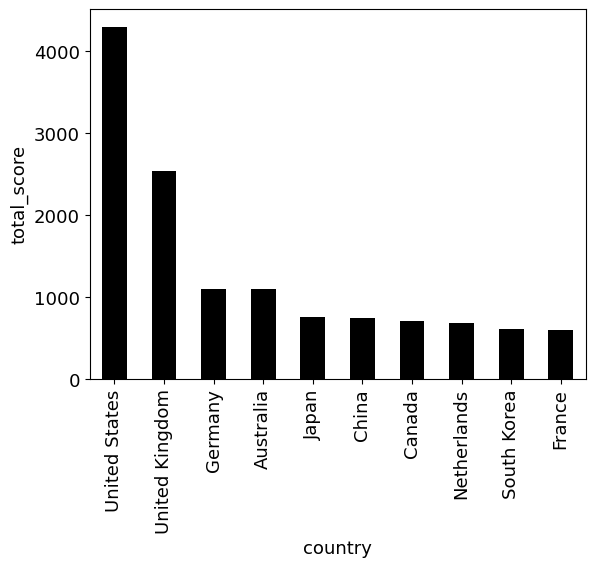

In [30]:
# create the bar plot using the DataFrame 'top_10_total_score' with the x-axis labelled "country" 
# and the y-axis labelled "total_score"
bar_plot(top_10_total_score, "country", "total_score")

**Question 7:** What are the **top** *10* institutions in the *United States* which had the **highest** *international_score* in the `year` *2020*?

The *international_score* of an institution is defined as the **sum** of `international_faculty` and `international_students` scores of that institution. You **must** display the columns `institution_name` and `international_score`. The rows **must** be in *descending* order of `international_score`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**international_score**|
|---------|------|---------|
|**0**|Massachusetts Institute Of Technology|194.1|
|**1**|California Institute Of Technology|186.7|
|**2**|Carnegie Mellon University|183.5|
|**3**|Rice University|180.4|
|**4**|Northeastern University|179.1|
|**5**|Stanford University|167.5|
|**6**|Cornell University|166.1|
|**7**|Purdue University|158.2|
|**8**|University Of Rochester|157.9|
|**9**|University Of Chicago|151.2|

In [31]:
# compute and store the answer in the variable 'top_10_inter_score', then display it
top_10_inter_score = pd.read_sql("""SELECT institution_name, sum(international_faculty + international_students) as international_score
FROM rankings
WHERE year = 2020 AND country = 'United States'
GROUP BY institution_name
ORDER BY international_score DESC
LIMIT 10
""", conn)

top_10_inter_score

,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


In [32]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8:** Create a **scatter plot** representing the `citations_per_faculty` (on the **x-axis**) against the `overall_score` (on the **y-axis**) of each institution in the `year` *2018*.

You **must** first compute a **DataFrame** `citations_overall` containing the **citations_per_faculty**, and the **overall_score** data from the `year` *2018*, of each **institution**.

In [33]:
# first compute and store the DataFrame 'citations_overall', then display its head
# do NOT plot just yet
citations_overall = pd.read_sql("""SELECT citations_per_faculty, overall_score
FROM rankings
WHERE year = 2018
""", conn)
citations_overall.head()

,citations_per_faculty,overall_score
0,99.9,100.0
1,99.4,98.7
2,99.9,98.4
3,100.0,97.7
4,78.3,95.6


In [34]:
grader.check("q8")

q8 results: All test cases passed!

Now, **plot** `citations_overall` as **scatter plot** with the **x-axis** labelled *citations_per_faculty* and the **y-axis** labelled *overall_score*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

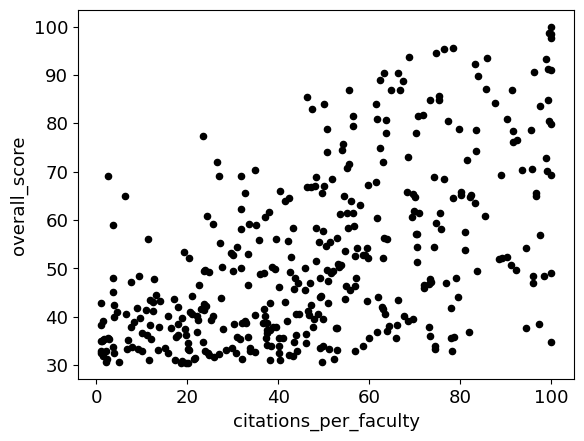

In [35]:
# create the scatter plot using the DataFrame 'citations_overall' with the x-axis labelled "citations_per_faculty" 
# and the y-axis labelled "overall_score"
scatter_plot(citations_overall, "citations_per_faculty", "overall_score")

**Question 9:** Create a **scatter plot** representing the `academic_reputation` (on the **x-axis**) against the `employer_reputation` (on the **y-axis**) of each institution from the *United States* in the `year` *2019*.

You **must** first compute a **DataFrame** `reputations_usa` containing the **academic_reputation**, and the **employer_reputation** data from the `year` *2019*, of each **institution** in the `country` *United States*.

In [36]:
# first compute and store the DataFrame 'reputations_usa', then display its head
# do NOT plot just yet
reputations_usa = pd.read_sql("""SELECT academic_reputation, employer_reputation
FROM rankings
WHERE country = 'United States' AND year = 2019
""", conn)
reputations_usa.head()

,academic_reputation,employer_reputation
0,100.0,100.0
1,100.0,100.0
2,100.0,100.0
3,98.7,81.2
4,99.6,90.7


In [37]:
grader.check("q9")

q9 results: All test cases passed!

Now, **plot** `reputations_usa` as **scatter plot** with the **x-axis** labelled *academic_reputation* and the **y-axis** labelled *employer_reputation*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

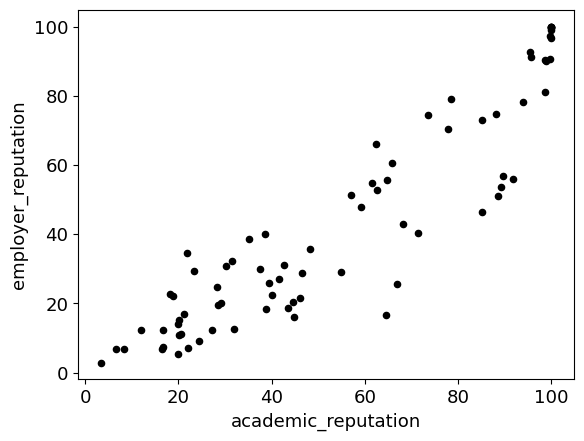

In [38]:
# create the scatter plot using the DataFrame 'reputations_usa' with the x-axis labelled "academic_reputation" 
# and the y-axis labelled "employer_reputation"
scatter_plot(reputations_usa, "academic_reputation", "employer_reputation")

**Question 10:** Create a **scatter plot** representing the `international_students` (on the **x-axis**) against the `faculty_student_score` (on the **y-axis**) for the **top ranked** institution of **each** `country` in the `year` *2020*.

You **must** first compute a **DataFrame** `top_ranked_inter_faculty` containing the **international_students**, and the **faculty_student_score** data from the `year` *2020*, of the **top** ranked **institution** (i.e., the institution with the **least** `rank`) of each **country**.

**Hint:** You can use the `MIN` SQL function to return the least value of a selected column. However, there are a few things to keep in mind while using this function.
* The function must be in **uppercase** (i.e., you must use `MIN`, and **not** `min`).
* The column you are finding the minimum of must be inside backticks (``` ` ```). For example, if you want to find the minimum `rank`, you need to say ```MIN(`rank`)```.

If you do not follow the syntax above, your code will likely fail.

In [39]:
# first compute and store the DataFrame 'top_ranked_inter_faculty', then display its head
# do NOT plot just yet
top_ranked_inter_faculty = pd.read_sql("""SELECT MIN(`rank`), international_students, faculty_student_score
FROM rankings
WHERE year = 2020

GROUP BY country
""", conn)
top_ranked_inter_faculty.head()

,MIN(`rank`),international_students,faculty_student_score
0,74,64.7,77.4
1,29,99.8,37.5
2,154,92.5,26.2
3,351,20.6,94.2
4,80,37.5,11.8


In [40]:
grader.check("q10")

q10 results: All test cases passed!

Now, **plot** `top_ranked_inter_faculty` as **scatter plot** with the **x-axis** labelled *international_students* and the **y-axis** labelled *faculty_student_score*.

You **must** use the `scatter_plot` function to create the plot.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

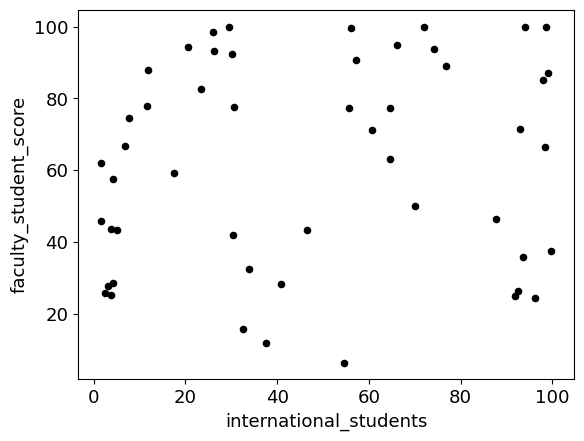

In [41]:
# create the scatter plot using the DataFrame 'top_ranked_inter_faculty' with the x-axis labelled "international_students" 
# and the y-axis labelled "faculty_student_score"
scatter_plot(top_ranked_inter_faculty, "international_students", "faculty_student_score")

### Correlations:

You can use the `.corr()` method on a **DataFrame** that has **two** columns to get the *correlation* between those two columns.

For example, if we have a **DataFrame** `df` with the two columns `citations_per_faculty` and `overall_score`, `df.corr()` would return

||**citations_per_faculty**|**overall_score**|
|---------|------|---------|
|citations_per_faculty|1.000000|0.574472|
|overall_score|0.574472|1.000000|

You can use `.loc` here to **extract** the *correlation* between the two columns (`0.574472` in this case).

**Question 11:** Find the **correlation** between `international_students` and `overall_score` for institutions from the `country` *United Kingdom* that were ranked in the **top** *100* in the `year` *2020*.

Your output **must** be a **float** representing the absolute correlations. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [42]:
# compute and store the answer in the variable 'uk_inter_score_corr', then display it
uk_inter_score = pd.read_sql("""SELECT international_students, overall_score
FROM rankings
WHERE country = 'United Kingdom' AND year = 2020 AND rank <= 100
""", conn)
uk_inter_score_corr = uk_inter_score.corr().loc["international_students"]["overall_score"]
uk_inter_score_corr

0.5213253604130499

In [43]:
grader.check("q11")

q11 results: All test cases passed!

Let us now define a new score called `citations_per_international` as follows:

$$\texttt{citations}\_\texttt{per}\_\texttt{international} = \frac{\texttt{citations}\_\texttt{per}\_\texttt{faculty} \times \texttt{international}\_\texttt{faculty}}{100}.$$


**Question 12:** Find the **correlation** between `citations_per_international` and `overall_score` for **all** institutions in the `year` *2019*.

Your output **must** be a **float** representing the absolute correlations. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [44]:
# compute and store the answer in the variable 'cit_per_inter_score_corr', then display it
cit_per_inter_score = pd.read_sql("""SELECT (citations_per_faculty * international_faculty / 100) as citations_per_international, overall_score
FROM rankings
WHERE year = 2019
""", conn)
cit_per_inter_score_corr = cit_per_inter_score.corr().loc["citations_per_international"]["overall_score"]
cit_per_inter_score_corr

0.557397228343763

In [45]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13:** What are the **top** *15* countries with the **highest** *total* of `citations_per_international` in the `year` *2019*.


The *total* `citations_per_international` of a `country` is defined as the **sum** of `citations_per_international` scores of **all** institutions in that `country`. You **must** display the columns `country` and `sum_inter_citations`. The rows **must** be in *descending* order of `sum_inter_citations`.

Your output **must** be a **DataFrame** that looks like this:

||**country**|**sum_inter_citations**|
|----|-----------|-----------------------|
|**0**|United States|2623.8207|
|**1**|United Kingdom|2347.1602|
|**2**|Australia|1255.5530|
|**3**|Netherlands|748.4268|
|**4**|Canada|724.5029|
|**5**|Switzerland|561.8790|
|**6**|China|482.2577|
|**7**|Germany|455.5466|
|**8**|Hong Kong|375.3032|
|**9**|New Zealand|327.3357|
|**10**|Sweden|305.3745|
|**11**|Belgium|255.0750|
|**12**|France|198.0860|
|**13**|Denmark|186.4904|
|**14**|Singapore|160.3000|

In [46]:
# compute and store the answer in the variable 'top_cit_per_inter', then display it
top_cit_per_inter = pd.read_sql("""SELECT country, sum(citations_per_faculty * international_faculty / 100) as sum_inter_citations
FROM rankings
WHERE year = 2019
GROUP BY country
ORDER BY sum_inter_citations DESC
LIMIT 15
""", conn)
top_cit_per_inter


,country,sum_inter_citations
0,United States,2623.8207
1,United Kingdom,2347.1602
2,Australia,1255.5530
3,Netherlands,748.4268
4,Canada,724.5029
5,Switzerland,561.8790
6,China,482.2577
7,Germany,455.5466
8,Hong Kong,375.3032
9,New Zealand,327.3357


In [47]:
grader.check("q13")

q13 results: All test cases passed!

**Question 14:** Among the institutions ranked within the **top** *300*, find the **average** `citations_per_international` for **each** `country` in the `year` *2019*.

You **must** display the columns `country` and `avg_inter_citations` representing the **average** of `citations_per_international` for **each** country. The rows **must** be in *descending* order of `avg_inter_citations`.

**Hint:** To find the **average**, you can use `SUM()` and `COUNT()` or you can simply use `AVG()`.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**country**|**avg_inter_citations**|
|----|-----------|----------------------|
|**0**|Singapore|80.150000|
|**1**|Switzerland|75.497000|
|**2**|Hong Kong|62.550533|
|**3**|Australia|61.362388|
|**4**|Netherlands|56.166733|
|**5**|New Zealand|53.226220|
|**6**|United Kingdom|52.889084|
|**7**|Canada|50.779723|
|**8**|Denmark|46.196200|
|**9**|Norway|46.083300|

In [48]:
# compute and store the answer in the variable 'avg_cit_per_inter', then display it
avg_cit_per_inter = pd.read_sql("""
SELECT country, AVG(citations_per_faculty * international_faculty / 100) as avg_inter_citations
FROM rankings
WHERE year = 2019 AND rank <= 300
GROUP BY country
ORDER BY avg_inter_citations DESC
""", conn)
avg_cit_per_inter.head(10)

,country,avg_inter_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [49]:
grader.check("q14")

q14 results: All test cases passed!

**Question 15** Find the **institution** with the **highest** value of `citations_per_international` for **each** `country` in the `year` *2020*.

Your output **must** be a **DataFrame** with the columns `country`, `institution_name`, and a new column `max_inter_citations` representing the **maximum** value of `citations_per_international` for that country. The rows **must** be in *descending* order of `max_inter_citations`. You **must** **omit** rows where `max_inter_citations` is **missing** by using the clause:

```sql
HAVING `max_inter_citations` IS NOT NULL
```

**Hint:** You can use the `MAX()` function to return the largest value within a group.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**country**|**institution_name**|**max_inter_citations**|
|----|-----------|--------------------|----------------------|
|**0**|United States|Massachusetts Institute Of Technology|99.8000|
|**1**|Switzerland|Ecole Polytechnique Fédérale De Lausanne|98.9000|
|**2**|Netherlands|Eindhoven University Of Technology|95.4493|
|**3**|United Kingdom|London School Of Economics And Political Science|91.1000|
|**4**|Hong Kong|The Hong Kong University Of Science And Technology|89.5000|
|**5**|Singapore|Nanyang Technological University|88.8000|
|**6**|Australia|The University Of Western Australia|88.3000|
|**7**|Belgium|Katholieke Universiteit Leuven|76.7700|
|**8**|New Zealand|University Of Waikato|73.6434|
|**9**|Canada|Western University|72.3240|


In [50]:
# compute and store the answer in the variable 'max_cit_per_inter', then display it
max_cit_per_inter = pd.read_sql("""SELECT country, institution_name, max(citations_per_faculty * international_faculty / 100) as max_inter_citations
FROM rankings
WHERE year = 2020
GROUP BY country
HAVING `max_inter_citations` IS NOT NULL
ORDER BY max_inter_citations DESC
""", conn)

max_cit_per_inter.head(10)

,country,institution_name,max_inter_citations
0,United States,Massachusetts Institute Of Technology,99.8000
1,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
2,Netherlands,Eindhoven University Of Technology,95.4493
3,United Kingdom,London School Of Economics And Political Science,91.1000
4,Hong Kong,The Hong Kong University Of Science And Technology,89.5000
5,Singapore,Nanyang Technological University,88.8000
6,Australia,The University Of Western Australia,88.3000
7,Belgium,Katholieke Universiteit Leuven,76.7700
8,New Zealand,University Of Waikato,73.6434
9,Canada,Western University,72.3240


In [51]:
grader.check("q15")

q15 results: All test cases passed!

**Question 16**: Among the institutions ranked within the **top** *50*, create a **horizontal bar plot** representing the **average** of both the`citations_per_faculty` and `international_faculty` scores for **all** institutions in **each** `country` in the `year` *2018*.

You **must** first create a **DataFrame** `country_citations_inter` with **three** columns: `country`, `avg_citations` and `avg_inter_faculty` representing the name, the average value of `citations_per_faculty` and the average value of `international_faculty` for each country respectively.

You **must** ensure that the countries in the **DataFrame** are **ordered** in **increasing** order of the **difference** between `avg_citations` and `avg_inter_faculty`.

In [52]:
# first compute and store the DataFrame 'country_citations_inter', then display it
# do NOT plot just yet
country_citations_inter = pd.read_sql("""
SELECT country, AVG(citations_per_faculty) as avg_citations, AVG(international_faculty) as avg_inter_faculty
FROM rankings
WHERE year = 2018 AND rank <= 50
GROUP BY country
ORDER BY (avg_citations - avg_inter_faculty)
""", conn)

country_citations_inter

,country,avg_citations,avg_inter_faculty
0,Canada,55.700000,92.950000
1,Hong Kong,69.050000,99.950000
2,United Kingdom,65.988889,95.788889
3,Singapore,74.750000,100.000000
4,Australia,79.260000,98.940000
5,Switzerland,98.950000,100.000000
6,France,100.000000,94.400000
7,China,66.900000,58.133333
8,United States,87.461111,73.894444
9,Japan,64.850000,11.400000


In [53]:
grader.check("q16")

q16 results: All test cases passed!

Now, **plot** `country_citations_inter` as **horizontal bar plot** with the **x-axis** labelled *country*.

Then, you **must** use the `horizontal_bar_plot` function to plot this data. Verify that the countries are **ordered** in **decreasing** order of the **difference** between `avg_citations` and `avg_inter_faculty`. Verify that the **legend** appears on your plot.

**Hint:** If you want the countries in the plot to be ordered in **decreasing** order of the difference, you will need to make sure that in the DataFrame, they are ordered in the **increasing** order.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

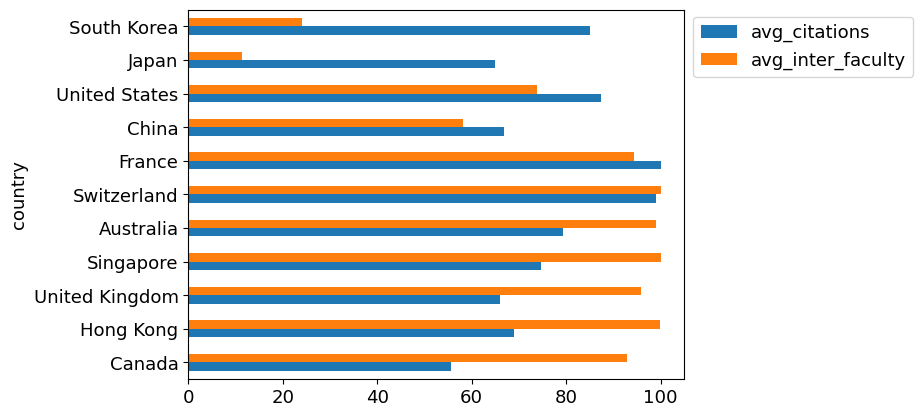

In [54]:
# create the horizontal bar plot using the DataFrame 'country_citations_inter' with the x-axis labelled "country" 
horizontal_bar_plot(country_citations_inter, "country")

**Question 17:** Create a **scatter plot** representing the `overall_score` (on the **x-axis**) against the `rank` (on the **y-axis**) for **all** institutions in the `year` *2020*. Additionally, **plot** a **regression line** within the same plot.

You **must** first compute a **DataFrame** containing the **overall_score**, and the **rank** data from the `year` *2020*. You **must** use the `get_regression_line` function to compute the best fit line.

In [55]:
# first compute and store the DataFrame 'overall_rank', then display its head
# do NOT plot just yet
overall_rank_original = pd.read_sql("""
SELECT overall_score, rank
FROM rankings
WHERE year = 2020
""", conn)

overall_rank = get_regression_line(overall_rank_original, "rank", "overall_score")

overall_rank.head()

,overall_score,rank,1,fit
0,100.0,1,1,78.221321
1,98.4,2,1,78.073809
2,97.4,3,1,77.926297
3,97.2,4,1,77.778785
4,96.9,5,1,77.631273


In [56]:
grader.check("q17")

q17 results: All test cases passed!

Now, **plot** `overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *overall_score* and the **y-axis** labelled *rank*.

You **must** use the `regression_line_plot` function to plot this data.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

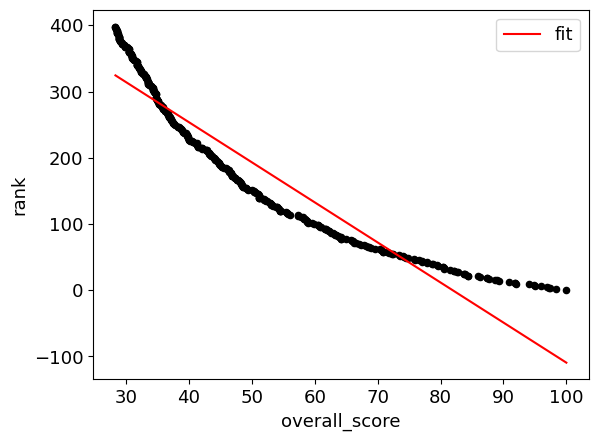

In [57]:
# create the scatter plot and the regression line using the DataFrame 'overall_rank' with the x-axis labelled "overall_score" 
# and the y-axis labelled "rank"
regression_line_plot(overall_rank, "overall_score", "rank")
plt.legend()

**Food for thought:** Does our linear regression model fit the points well? It looks like the relationship between the `overall_score` and `rank` is **not quite linear**. In fact, a cursory look at the data suggests that the relationship is in fact, inverse.

In [58]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to

**Question 18:** Create a **scatter plot** representing the **inverse** of the `overall_score` (on the **x-axis**) against the `rank` (on the **y-axis**) for **all** institutions in the `year` *2020*. Additionally, **plot** a **regression line**  within the same plot.

The `inverse_overall_score` for each institution is simply defined as `1/overall_score` for that institution. You **must** first compute a **DataFrame** containing the **inverse_overall_score**, and the **rank** data from the `year` *2020*. You **must** use the `get_regression_line` function to compute the best fit line.

In [59]:
# first compute and store the DataFrame 'inverse_overall_rank', then display its head
# do NOT plot just yet
inverse_overall_rank_original = pd.read_sql("""
SELECT (1/overall_score) as inverse_overall_score, rank
FROM rankings
WHERE year = 2020
""", conn)

inverse_overall_rank = get_regression_line(inverse_overall_rank_original, "rank", "inverse_overall_score")
inverse_overall_rank.head()

,inverse_overall_score,rank,1,fit
0,0.010000,1,1,0.010503
1,0.010163,2,1,0.010566
2,0.010267,3,1,0.010629
3,0.010288,4,1,0.010691
4,0.010320,5,1,0.010754


In [60]:
grader.check("q18")

q18 results: All test cases passed!

Now, **plot** `inverse_overall_rank` as **scatter plot** with a **regression line** with the **x-axis** labelled *inverse_overall_score* and the **y-axis** labelled *rank*.

You **must** use the `regression_line_plot` function to plot this data.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

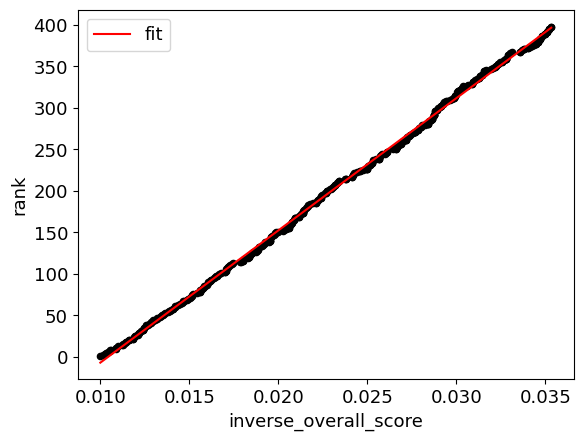

In [61]:
# create the scatter plot and the regression line using the DataFrame 'inverse_overall_rank'
# with the x-axis labelled "inverse_overall_score" and the y-axis labelled "rank"
regression_line_plot(inverse_overall_rank, "inverse_overall_score", "rank")
plt.legend()

This seems to be much better! Let us now use this **regression line** to **estimate** the `rank` of an institution given its `overall_score`.

**Question 19:** Use the regression line to **estimate** the `rank` of an institution with an `overall_score` of *72*.

Your output **must** be an **int**. If your **estimate** is a **float**, *round it up* using `math.ceil`.


**Hints:**
1. Call the `get_regression_coeff` function to get the coefficients `m` and `b`.
2. Recall that the equation of a line is `y = m * x + b`. What are `x` and `y` here?

In [62]:
# compute and store the answer in the variable 'rank_score_72', then display it
overall_rank_coeff = get_regression_coeff(inverse_overall_rank, "inverse_overall_score", "fit")
overall_rank_coeff
rank_score_72 = math.ceil(overall_rank_coeff[0] * (1/72) + overall_rank_coeff[1])
rank_score_72

56

In [63]:
grader.check("q19")

q19 results: All test cases passed!

**Food for thought:** Can you find out the `overall_score` of the university with this `rank` in the `year` *2020*? Does it match your prediction?

In [64]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to

**Question 20:** Using the data from Question 5, create a **pie plot** representing the number of institutions from each country.

You **have** already computed a **DataFrame** `num_institutions` (in Question 5) containing the **country**, and the **num_of_institutions** data. Run the following cell just to confirm that the variable has not changed its values since you defined it in Question 5.

In [65]:
grader.check("q20")

q20 results: All test cases passed!

Now, **plot** `num_institutions` as **pie plot** with the **title** *Number of institutions*.

Now, you **must** use the `pie_plot` function to create the **pie plot**. The **colors** do **not** matter, but the plot **must** be titled `Number of institutions`, and **must** be labelled as in the sample output below.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. If your plot is not visible, or if it is not properly labelled, the Gradescope autograder will **deduct points**.

Your plot should look like this:

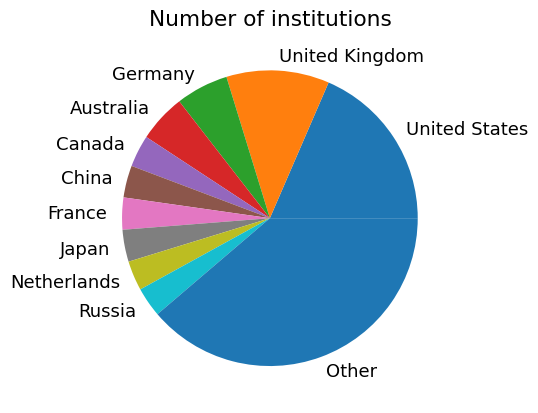

In [66]:
# create the pie plot using the DataFrame 'num_institutions' titled "Number of institutions"
pie_plot(num_institutions, "country", "num_of_institutions", "Number of institutions")

**Food for thought:** It seems that we'll run out of colors! How can we make it so that **no two neighbors share a color**? You'll probably have to look online.

In [67]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to

### Closing the database connection:

Now, before you **submit** your notebook, you **must** **close** your connection `conn`. Not doing this might make **Gradescope fail**. Additionally, **delete** the example images provided with plot questions to save space, if your notebook file is too large for submission. You can **delete** any cell by selecting the cell, hitting the `Esc` key once, and then hitting the `d` key **twice**.

In [68]:
# close your connection here
conn.close()

## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output. The following cells will generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [69]:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [70]:
!jupytext --to py p13.ipynb

[jupytext] Reading p13.ipynb in format ipynb
[jupytext] Writing p13.py (destination file replaced)


In [71]:
p13_test.check_file_size("p13.ipynb")
grader.export(pdf=False, run_tests=True, files=[py_filename])

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!

    q11 results: All test cases passed!

    q12 results: All test cases passed!

    q13 results: All test cases passed!

    q14 results: All test cases passed!

    q15 results: All test cases passed!

    q16 results: All test cases passed!

    q17 results: All test cases passed!

    q18 results: All test cases passed!

    q19 results: All test cases passed!

    q20 results: All test cases passed!
